<a href="https://colab.research.google.com/github/jorisschellekens/borb-google-colab-examples/blob/main/using_borb_to_create_a_report_in_pdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ![borb logo](https://github.com/jorisschellekens/borb/raw/master/logo/borb_64.png) Using `borb` to create a report in PDF

[`borb`](https://github.com/jorisschellekens/borb) is a library for reading, creating and manipulating PDF files in python. borb was created in 2020 by Joris Schellekens and is still in active development. Check out the [GitHub repository](https://github.com/jorisschellekens/borb), or the [borb website](https://borbpdf.com).

Let's start by installing `borb`

In [31]:
pip install borb

For this tutorial we're also going to need:

- matplotlib
- pandas (possibly, if you want to do some more advanced graphs/charts)

In [32]:
pip install matplotlib

Before we can create a piechart, we're going to write a small utility function that generates N colors, evenly distributed among the color-spectrum. This will help us whenever we need to create a plot and color each section.

In [33]:
# new import(s)
from borb.pdf.canvas.color.color import HSVColor, HexColor
from decimal import Decimal

def create_n_colors(n: int) -> typing.List[str]:
  # the base color is borb-blue
  base_hsv_color: HSVColor = HSVColor.from_rgb(HexColor("56cbf9"))
  # this array comprehension creates n HSVColor objects, transforms then to RGB, and then returns their hex string
  return [HSVColor(base_hsv_color.hue + Decimal(x / 360), Decimal(1), Decimal(1)).to_rgb().to_hex_string() for x in range(0, 360, int(360/n))]

Now we can define our `create_pie_chart` function;

In [34]:
# new import(s)
import matplotlib.pyplot as plt
import typing
from borb.pdf.canvas.layout.image.chart import Chart
from borb.pdf.canvas.layout.layout_element import Alignment


def create_piechart(labels: typing.List[str], data: typing.List[float]):

  fig1, ax1 = plt.subplots()
  ax1.pie(
    data,
    explode=[0 for _ in range(0, len(labels))],
    labels=labels,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90,
    colors=create_n_colors(len(labels)),
  )

  ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

  return Chart(
    plt.gcf(),
    width=Decimal(200),
    height=Decimal(200),
    horizontal_alignment=Alignment.CENTERED,
  )

Now let's create a PDF document using our function

In [35]:
# new import(s)
from borb.pdf.document import Document
from borb.pdf.page.page import Page
from borb.pdf.pdf import PDF
from borb.pdf.canvas.layout.page_layout.multi_column_layout import MultiColumnLayout
from borb.pdf.canvas.layout.page_layout.page_layout import PageLayout
from borb.pdf.canvas.layout.text.paragraph import Paragraph

# create empty Document
pdf = Document()

# create empty Page
page = Page()

# add Page to Document
pdf.append_page(page)

# create PageLayout
layout: PageLayout = MultiColumnLayout(page)

# write title
layout.add(Paragraph("About Lorem Ipsum", 
                     font_size=Decimal(20), 
                     font="Helvetica-Bold"))

We'll be using hyphenation in this PDF to ensure the text can be laid out even more smoothly. Hyphenation in `borb` is pretty straightforward;

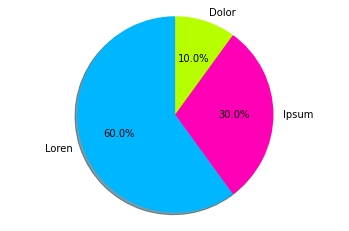

In [36]:
# new import(s)
from borb.pdf.canvas.layout.hyphenation.hyphenation import Hyphenation

# create hyphenation algorithm
hyphenation_algorithm: Hyphenation = Hyphenation("en-gb")

# write paragraph
layout.add(Paragraph(
    """
    Lorem Ipsum is simply dummy text of the printing and typesetting industry. 
    Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, 
    when an unknown printer took a galley of type and scrambled it to make a type specimen book. 
    It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. 
    It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, 
    and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.
    """, text_alignment=Alignment.JUSTIFIED, hyphenation=hyphenation_algorithm))

# write graph
layout.add(create_piechart(["Loren", "Ipsum", "Dolor"], 
                           [0.6, 0.3, 0.1]))

# write paragraph
layout.add(Paragraph(
    """
    Contrary to popular belief, Lorem Ipsum is not simply random text. 
    It has roots in a piece of classical Latin literature from 45 BC, making it over 2000 years old. 
    Richard McClintock, a Latin professor at Hampden-Sydney College in Virginia, looked up one of the more obscure Latin words, 
    consectetur, from a Lorem Ipsum passage, and going through the cites of the word in classical literature, 
    discovered the undoubtable source. Lorem Ipsum comes from sections 1.10.32 and 1.10.33 of "de Finibus Bonorum et Malorum" 
    (The Extremes of Good and Evil) by Cicero, written in 45 BC. 
    This book is a treatise on the theory of ethics, very popular during the Renaissance.
    """, text_alignment=Alignment.JUSTIFIED, hyphenation=hyphenation_algorithm))

# write paragraph
layout.add(Paragraph(
    """
    It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. 
    The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', 
    making it look like readable English. Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, 
    and a search for 'lorem ipsum' will uncover many web sites still in their infancy. 
    Various versions have evolved over the years, sometimes by accident, sometimes on purpose (injected humour and the like).
    """, text_alignment=Alignment.JUSTIFIED, hyphenation=hyphenation_algorithm))

# write to disk
with open("output.pdf", "wb") as pdf_file_handle:
  PDF.dumps(pdf_file_handle, pdf)

Now we can add a piechart using the function we declared earlier;

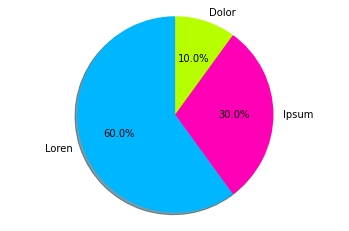

In [37]:
# write graph
layout.add(create_piechart(["Loren", "Ipsum", "Dolor"], 
                           [0.6, 0.3, 0.1]))

Next we're going to write two more `Paragraph` objects

In [38]:
# write paragraph
layout.add(Paragraph(
    """
    Contrary to popular belief, Lorem Ipsum is not simply random text. 
    It has roots in a piece of classical Latin literature from 45 BC, making it over 2000 years old. 
    Richard McClintock, a Latin professor at Hampden-Sydney College in Virginia, looked up one of the more obscure Latin words, 
    consectetur, from a Lorem Ipsum passage, and going through the cites of the word in classical literature, 
    discovered the undoubtable source. Lorem Ipsum comes from sections 1.10.32 and 1.10.33 of "de Finibus Bonorum et Malorum" 
    (The Extremes of Good and Evil) by Cicero, written in 45 BC. 
    This book is a treatise on the theory of ethics, very popular during the Renaissance.
    """, text_alignment=Alignment.JUSTIFIED, hyphenation=hyphenation_algorithm))

# write paragraph
layout.add(Paragraph(
    """
    It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. 
    The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 'Content here, content here', 
    making it look like readable English. Many desktop publishing packages and web page editors now use Lorem Ipsum as their default model text, 
    and a search for 'lorem ipsum' will uncover many web sites still in their infancy. 
    Various versions have evolved over the years, sometimes by accident, sometimes on purpose (injected humour and the like).
    """, text_alignment=Alignment.JUSTIFIED, hyphenation=hyphenation_algorithm))

Finally, we can store the `Document`

In [39]:
# write to disk
with open("output.pdf", "wb") as pdf_file_handle:
  PDF.dumps(pdf_file_handle, pdf)